In [2]:
import pandas as pd
import numpy as np

# Working with Time Series

Pandas was originally developed for financial modeling, so it has a very comprehensive set of tools for working with time series data.

## Dates and Times in Python

First, we take a look at the `datetime` module built into Python, as well as the `dateutil` module.

In [3]:
from datetime import datetime
from dateutil import parser

print(datetime(year=2015, month=7, day=4)) # creating a datetime.datetime obj
date = parser.parse('2020 4th of July') # extremely flexible with string dates

2015-07-04 00:00:00


## Dates and Times in Python

The key objects in Pandas for working with time-series data are: `Timestamp`, `DatetimeIndex`, `Period`, and `Timedelta`.

In [4]:
# As a note, dates are stored in a way that if the timezone is specified, it is always converted to be relative to UTC, and if the timezone is not specified, they remain in their naive time

# either specify tz or use .tz_localize() method after initialization
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

`date` is a `pd.Timestamp` object. It's often converted from a string or a datetime object.

In [5]:
print(date.year)
print(date.month)
print(date.day)
print(date.day_of_week)
print(date.weekofyear)
print(date.day_name())

2015
7
4
5
27
Saturday


In [6]:
date.strftime('%A')

'Saturday'

`pd.DatetimeIndex` objects are typically either created via `pd.to_datetime()` with an array-like argument or `pd.date_range()`.

In [7]:
date_list = ['2025-08-19', '2025-08-20', '2025-08-21']
dti = pd.to_datetime(date_list)
dti

DatetimeIndex(['2025-08-19', '2025-08-20', '2025-08-21'], dtype='datetime64[ns]', freq=None)

In [8]:
pd.date_range(start='2025-01-01', end='2025-01-05', freq='D')

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05'],
              dtype='datetime64[ns]', freq='D')

`pd.DatetimeIndex` is important due to its capabilities in indexing/slicing using string representations of dates.

In [9]:
# Create a time series
index = pd.DatetimeIndex(['2022-01-01', '2022-01-02', '2022-02-01', '2022-02-02'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2022-01-01    0
2022-01-02    1
2022-02-01    2
2022-02-02    3
dtype: int64

In [10]:
# Slicing by year
data['2022']

2022-01-01    0
2022-01-02    1
2022-02-01    2
2022-02-02    3
dtype: int64

In [11]:
# Slicing by month
data['2022-02']

2022-02-01    2
2022-02-02    3
dtype: int64

`pd.Period` and `pd.PeriodIndex` objects represent a span or interval of time. This is different from `pd.Timestamp`, which represents a specific instance in time.

However, these are often limited in terms of being fixed and calendar-aligned. For example, regardless of the date inserted -- whether that be August 1st or August 15th -- the freq='M' will always just make it into `Period('2025-08', 'M')`.

In [12]:
period = pd.Period('2025-08-01', freq='M')
period

Period('2025-08', 'M')

In [13]:
revenue_data = {
    '2024Q1': 105, '2024Q2': 110, '2024Q3': 118, '2024Q4': 125,
    '2025Q1': 112, '2025Q2': 120, '2025Q3': 128, '2025Q4': 138
}

# freq must be specified and cannot be inferred
p_index = pd.PeriodIndex(revenue_data.keys(), freq='Q')

revenue_ser = pd.Series(list(revenue_data.values()), index=p_index)
revenue_ser['2024']

2024Q1    105
2024Q2    110
2024Q3    118
2024Q4    125
Freq: Q-DEC, dtype: int64

`pd.Timedelta` represents a *difference* between two points in time. It can be positive or negative.

It's not a range/interval of time, but rather a quantity of time between two points. They are often used for date arithmetic (add/subtracted from `Timestamps`).

In [14]:
ts1 = pd.to_datetime('2025-08-22 10:00:00')
ts2 = pd.Timestamp('2025-08-19 08:00:00')
ts1 - ts2

Timedelta('3 days 02:00:00')

In [15]:
ts2 - ts1 # node the signage

Timedelta('-4 days +22:00:00')

It may also be created from calling the class directly.

In [16]:
pd.Timedelta('5 days 4 hours 30 minutes')

Timedelta('5 days 04:30:00')

In [17]:
pd.Timedelta(6, unit='h')

Timedelta('0 days 06:00:00')

## Resampling, Shifting, and Windowing

These three operations are critical for time series analysis.

Let's create some sample data to work with.

In [18]:
# Create a sample time series
ts = pd.Series(np.random.rand(365), index=pd.date_range('2022-01-01', periods=365, freq='D'))
ts

2022-01-01    0.295848
2022-01-02    0.977154
2022-01-03    0.614037
2022-01-04    0.243172
2022-01-05    0.386624
                ...   
2022-12-27    0.358175
2022-12-28    0.547797
2022-12-29    0.783727
2022-12-30    0.128900
2022-12-31    0.595795
Freq: D, Length: 365, dtype: float64

### Resampling

Resampling involves changing the frequency of your time series data. A common use is downsampling, for example, converting daily data to monthly data. This requires an aggregation function.

In [19]:
# Resample to monthly data and calculate the mean
ts.resample('ME').mean() # month-end frequency

2022-01-31    0.435310
2022-02-28    0.563550
2022-03-31    0.436323
2022-04-30    0.454813
2022-05-31    0.487585
2022-06-30    0.445923
2022-07-31    0.507866
2022-08-31    0.499221
2022-09-30    0.455900
2022-10-31    0.482788
2022-11-30    0.468237
2022-12-31    0.436593
Freq: ME, dtype: float64

### Shifting

The `shift()` method can be used to shift data backward or forward in time. This is useful for computing differences over time.

In [20]:
# Shift the data forward by one day
ts.shift(periods=1)

# note: 
# - periods is the number of rows/columns to shift by
# - freq changes behavior from positional shift to temporal shift (`DatetimeIndex` is shifted rather than values)

2022-01-01         NaN
2022-01-02    0.295848
2022-01-03    0.977154
2022-01-04    0.614037
2022-01-05    0.243172
                ...   
2022-12-27    0.641814
2022-12-28    0.358175
2022-12-29    0.547797
2022-12-30    0.783727
2022-12-31    0.128900
Freq: D, Length: 365, dtype: float64

### Windowing

A rolling window lets you perform calculations over a sliding window of time. This is great for things like calculating rolling averages to smooth out data.

<Axes: >

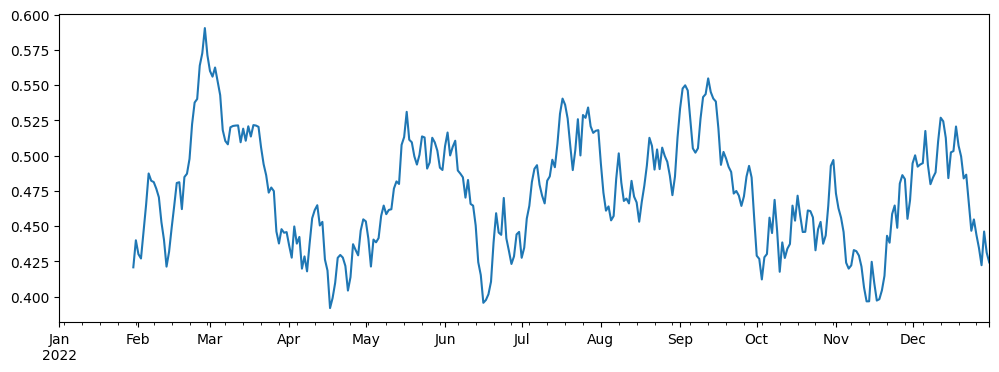

In [ ]:
# Calculate the 30-day rolling mean
ts.rolling(window=30).mean().plot(figsize=(12, 4))

# window specifies the number of rows/observations to include per calculation
# here, the first day with a value would be at index 29 (30th day), since the window must be full to make a calculation
    # if `window` is passed as an integer, then `min_periods` is automatically the size of the window; specifying `min_periods = 1` allows for calculations for windows even if they are not filled
# for every other day, it just shifts over by a single row; this is controlled by step parameter

## Example: Visualizing Seattle Bicycle Counts

Let's apply these concepts to the Seattle weather data you have.

In [22]:
# Load the data
seattle_weather = pd.read_csv('../data/Seattle2014.csv')
print(seattle_weather)

# Convert the DATE column to a DatetimeIndex
seattle_weather['DATE'] = pd.to_datetime(seattle_weather['DATE'])
seattle_weather.set_index('DATE', inplace=True)

seattle_weather.head()

               STATION                                STATION_NAME      DATE  \
0    GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140101   
1    GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140102   
2    GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140103   
3    GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140104   
4    GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20140105   
..                 ...                                         ...       ...   
360  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20141227   
361  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20141228   
362  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20141229   
363  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20141230   
364  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US  20141231   

     PRCP  SNWD  SNOW  TMAX  TMIN  AWND

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
DATE,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.020140101,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1970-01-01 00:00:00.020140102,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
1970-01-01 00:00:00.020140103,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
1970-01-01 00:00:00.020140104,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
1970-01-01 00:00:00.020140105,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


Let's analyze the daily precipitation.

<Axes: xlabel='DATE'>

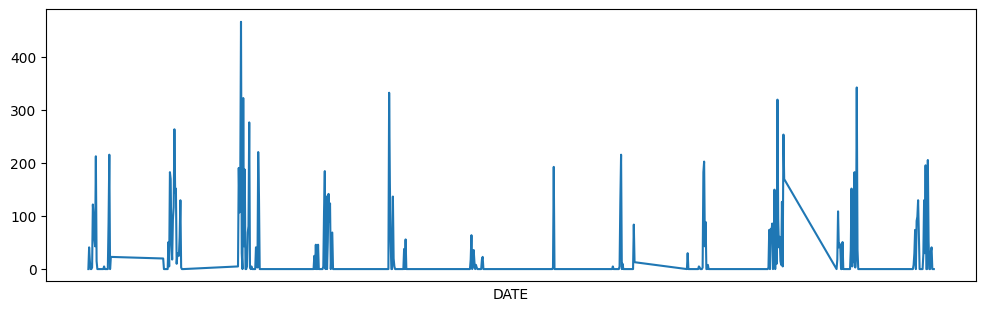

In [23]:
# Plot the daily precipitation
seattle_weather['PRCP'].plot(figsize=(12, 4))

The data is very noisy. Let's smooth it out with a 30-day rolling mean.

<Axes: xlabel='DATE'>

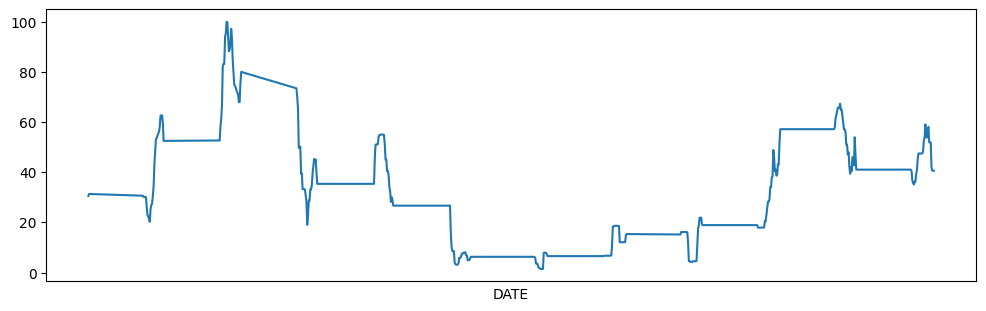

In [24]:
seattle_weather['PRCP'].rolling(30).mean().plot(figsize=(12, 4))

We can also resample the data to look at weekly trends. Let's find the mean max temperature for each week.

/opt/homebrew/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='DATE'>

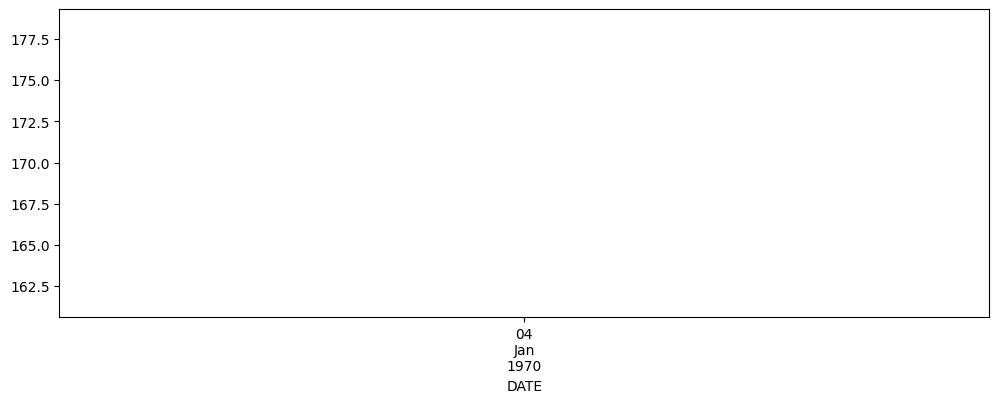

In [25]:
seattle_weather['TMAX'].resample('W').mean().plot(figsize=(12, 4))